# Loan Approval Prediction Using Machine Learning
In this Notebook, we are going to solve the Loan Approval Prediction. This is a classification problem in which we need to classify whether the loan will be approved or not. Classification refers to a predictive modeling problem where a class label is predicted for a given example of input data. A few examples of classification problems are Spam Email detection, Cancer detection, Sentiment Analysis, etc.

# Understanding the Problem Statement 
A loan is a bank's main source of revenue. The profits earned through loans account for most of the bank's profits. Even though the bank accepts the loan following a lengthy verification and testimony process, there is no guarantee that the chosen candidate is the right one. When done manually, this operation takes a long time. We can predict whether a given hopeful is safe or not, and the entire testimonial process is automated using machine literacy. Loan Prognostic is beneficial to both bank retainers and hopefuls. 

The Bank wants to automate the loan eligibility process (real-time) based on customer detail provided while filling out online application forms. These details are Gender, Marital Status, Education, number of Dependents, Income, Loan Amount, Credit History, and others.

To automate this process, they have provided a dataset to identify the customer segments that are eligible for loan amounts so that they can specifically target these customers.

As mentioned above this is a Binary Classification problem in which we need to predict our Target label which is “Loan Status”.

Loan status can have two values: Yes or No.

* Yes: if the loan is approved
* No: if the loan is not approved

So using the training dataset we will train our model and try to predict our target column that is “Loan Status” on the test dataset.

Wrote a Research Paper: https://drive.google.com/file/d/1icvTmA1wVRpmhW3iaz2ZyMvj_N0MAfA9/view?usp=sharing

# Load Essential Python Libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

# Load Training/ Test Dataset

In [50]:
train = "../input/loan-prediction-problem-dataset/train_u6lujuX_CVtuZ9i.csv"
train = pd.read_csv(train)
test = "../input/loan-prediction-problem-dataset/test_Y3wMUE5_7gLdaTN.csv"
test = pd.read_csv(test)

# About the dataset 

In [51]:
#Size of Train Data
train.shape

(614, 13)

So we have 614 rows and 13 columns in our training dataset.

In [52]:
#Size of Test Data
test.shape

(367, 12)

In test data, we have 367 rows and 12 columns because the target column is not included in the test data.

In [53]:
#Information about train Dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [54]:
# First look at the Dataset
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Categorical Columns: 
1. Gender (Male/Female), 
2. Married (Yes/No), 
3. Number of dependents (Possible values:0,1,2,3+), 
4. Education (Graduate / Not Graduate), 
5. Self-Employed (No/Yes), 
6. credit history(Yes/No), 
7. Property Area (Rural/Semi-Urban/Urban) and 
8. Loan Status (Y/N)(i. e. Target variable)

Numerical Columns: 
1. Loan ID, 
2. Applicant Income, 
3. Co-applicant Income, 
4. Loan Amount, and 
5. Loan amount term

# Data Preprocessing

In [55]:
# Concatenating the train and test data for data preprocessing:
data = pd.concat([train,test])

In [56]:
# Dropping the unwanted column:
data.drop('Loan_ID', inplace=True, axis='columns')

In [57]:
# Identify missing values:
data.isnull().sum()

Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [58]:
# Imputing the missing values:
data['Gender'].fillna(data['Gender'].mode()[0], inplace = True)
data['Married'].fillna(data['Married'].mode()[0], inplace = True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace = True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace = True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace = True)

In [59]:
# Next, we will be using Iterative imputer for filling missing values of LoanAmount and Loan_Amount_Term
data1 = data.loc[:,['LoanAmount','Loan_Amount_Term']]

from sklearn.ensemble import RandomForestRegressor
#Running the imputer with a Random Forest Estimator
imp = IterativeImputer(RandomForestRegressor(), max_iter=1000, random_state=0)
data1 = pd.DataFrame(imp.fit_transform(data1), columns=data1.columns)

data['LoanAmount'] = data1['LoanAmount']
data['Loan_Amount_Term'] = data1['Loan_Amount_Term']

In [60]:
# So now as we have imputed all the missing values we go on to mapping the categorical variables with the integers.
data['Gender'] = data['Gender'].map({'Male':0,'Female':1}).astype(int)
data['Married'] = data['Married'].map({'No':0,'Yes':1}).astype(int)
data['Education'] = data['Education'].map({'Not Graduate':0,'Graduate':1}).astype(int)
data['Self_Employed'] = data['Self_Employed'].map({'No':0,'Yes':1}).astype(int)
data['Credit_History'] = data['Credit_History'].astype(int)    

In [61]:
data['Property_Area'] = data['Property_Area'].map({'Urban':0,'Rural':1, 'Semiurban':2}).astype(int)
data['Dependents'] = data['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})

We map the values so that we can input the train data into the model as the model does not accept any string values.

In [62]:
#creating a new feature
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data.drop(['ApplicantIncome', 'CoapplicantIncome'], axis='columns', inplace=True)

# Exploratory Data Analysis (EDA) 

In [63]:
# Splitting the data to new_train and new_test so that we can perform EDA.
new_train = data.iloc[:614]
new_test = data.iloc[614:]

In [64]:
# Mapping ‘N’ to 0 and ‘Y’ to 1
new_train['Loan_Status'] = new_train['Loan_Status'].map({'N':0,'Y':1}).astype(int)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

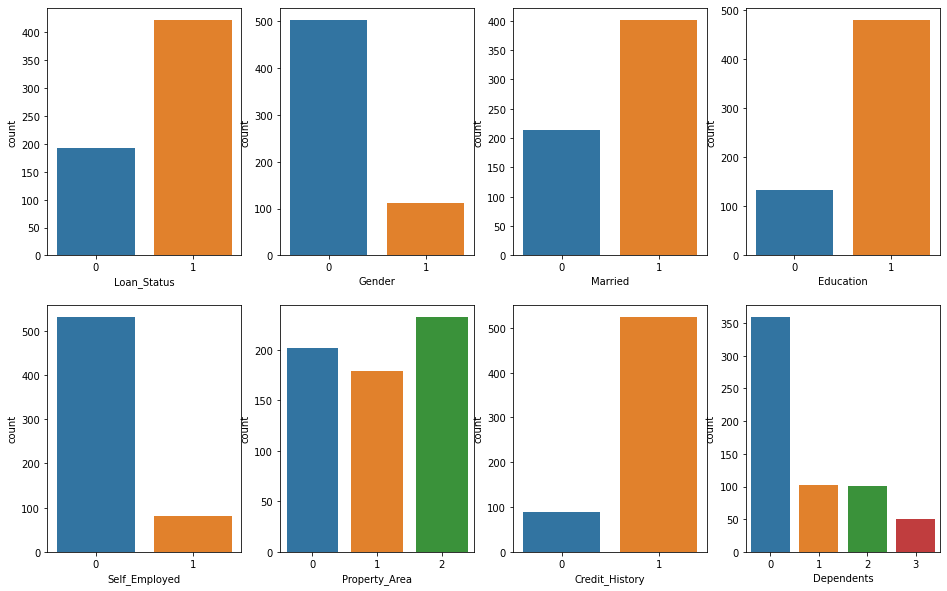

In [65]:
# Univariate Analysis:
fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot(x='Loan_Status', data = new_train, ax=ax[0][0])
sns.countplot(x='Gender', data = new_train, ax=ax[0][1])
sns.countplot(x='Married', data = new_train, ax=ax[0][2])
sns.countplot(x='Education', data = new_train, ax=ax[0][3])
sns.countplot(x='Self_Employed', data = new_train, ax=ax[1][0])
sns.countplot(x='Property_Area', data = new_train, ax=ax[1][1])
sns.countplot(x='Credit_History', data = new_train, ax=ax[1][2])
sns.countplot(x='Dependents', data = new_train, ax=ax[1][3])

Univariate Analysis Observations:

1. More Loans are approved Vs Rejected
2. Count of Male applicants is more than Female
3. Count of Married applicant is more than Non-married
4. Count of graduate is more than non-Graduate
5. Count of self-employed is less than that of Non-Self-employed
6. Maximum properties are located in Semiurban areas
7. Credit History is present for many applicants
8. The count of applicants with several dependents=0 is maximum.

<AxesSubplot:xlabel='Loan_Status', ylabel='Total_Income'>

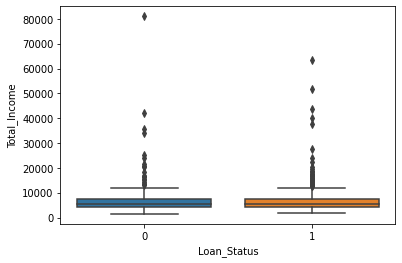

In [66]:
# Bivariate Analysis
sns.boxplot(x='Loan_Status', y='Total_Income', data=new_train)

Mean Total_Income of 0 and 1 are almost the same (o: no,1: Yes)

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

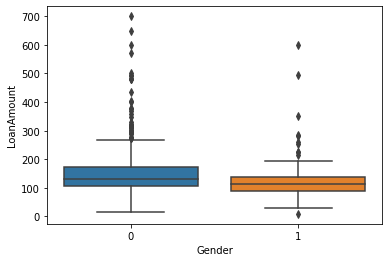

In [67]:
sns.boxplot(x='Gender', y='LoanAmount', data=new_train)

The mean value of Loan Amount applied by males (0) is slightly higher than Females(1).

<AxesSubplot:>

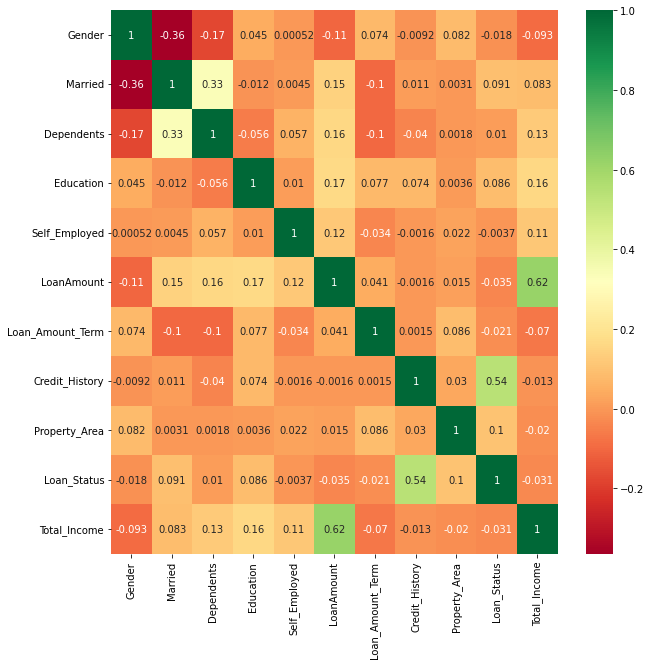

In [68]:
# Correlation matrix
plt.figure(figsize = (10,10))
correlation_matrix = new_train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')

# Building Machine Learning Model

In [69]:
# Creating X (input variables) and Y (Target Variable) from the new_train data.
x = new_train.drop('Loan_Status', axis='columns')
y = new_train['Loan_Status']

In [168]:
# Using train test split on the training data for validation
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=3)

We have a (70:30) split on the training data.

## Decison Tree

In [130]:
#Building the model using DecisonTree
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [131]:
# Now we will be making the predictions on the testing data directly as it is of more importance.
from sklearn import metrics

# Getting the accuracy score for Decision Tree
dtree_pred = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,dtree_pred)))

Accuracy Score = 0.7297297297297297


In [132]:
# Classification report and confusion matrix of the decision tree model
print(confusion_matrix(y_test, dtree_pred))
print(classification_report(y_test,dtree_pred))

[[ 23  22]
 [ 28 112]]
              precision    recall  f1-score   support

           0       0.45      0.51      0.48        45
           1       0.84      0.80      0.82       140

    accuracy                           0.73       185
   macro avg       0.64      0.66      0.65       185
weighted avg       0.74      0.73      0.74       185



## Random Forest

In [133]:
#Building the model using RandomForest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

# Getting the accuracy score for Random Forest
rfc_pred = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, rfc_pred)))

Accuracy_Score = 0.8162162162162162


In [134]:
# Classification report and confusion matrix of the Random Forest model
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test,rfc_pred))

[[ 26  19]
 [ 15 125]]
              precision    recall  f1-score   support

           0       0.63      0.58      0.60        45
           1       0.87      0.89      0.88       140

    accuracy                           0.82       185
   macro avg       0.75      0.74      0.74       185
weighted avg       0.81      0.82      0.81       185



## Logistic Regression

In [169]:
#Building the model using LogisticRegression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [170]:
logreg.predict(X_test)

# Getting the accuracy score for Logistic Regression
logreg_pred = logreg.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, logreg_pred)))

Accuracy_Score = 0.8432432432432433


In [171]:
# Classification report and confusion matrix of the SVM
print(confusion_matrix(y_test,logreg_pred ))
print(classification_report(y_test,logreg_pred))

[[ 21  24]
 [  5 135]]
              precision    recall  f1-score   support

           0       0.81      0.47      0.59        45
           1       0.85      0.96      0.90       140

    accuracy                           0.84       185
   macro avg       0.83      0.72      0.75       185
weighted avg       0.84      0.84      0.83       185



## Visualizing the ROC Curve

In [172]:
#Get predictions of Random Forest and Logistic Regression models in the form of probability values
y_lg_prob = logreg.predict_proba(X_test)[:,1]
y_rfc_prob = rfc.predict_proba(X_test)[:,1]

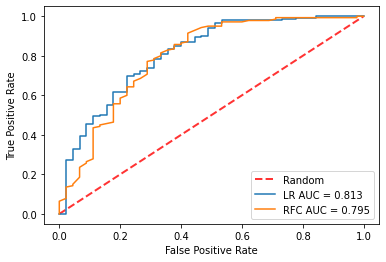

In [173]:
#For Logistic Regression
fpr, tpr, _ = metrics.roc_curve(y_test,y_lg_prob)
auc = metrics.roc_auc_score(y_test, y_lg_prob)

#For Random Forest
fpr1, tpr1, _1 = metrics.roc_curve(y_test,y_rfc_prob)
auc1 = metrics.roc_auc_score(y_test, y_rfc_prob)

#create ROC curve
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Random', alpha=.8)
plt.plot(fpr,tpr,label="LR AUC = "+str(round(auc,3)))
plt.plot(fpr1,tpr1,label="RFC AUC = "+str(round(auc1,3)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Feature Importance

Knowing about the feature importance is quite necessary as it shows that how much weightage each feature provides in the model building phase.

<AxesSubplot:>

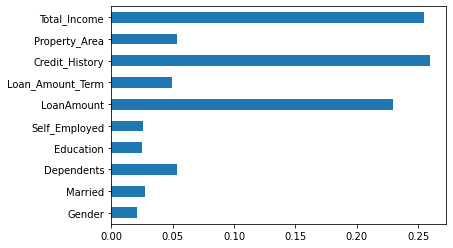

In [140]:
# Getting feature importances for Random Forest model
(pd.Series(rfc.feature_importances_, index=X_train.columns).plot(kind='barh'))

# The Conclusion from Model Building

Therefore, Random Forest and Logistic Regression are the best model for this prediction since their accuracy_score lies between 0.83 to 0.85.
After using all these customer records, we are able to build a machine learning model to accurately predict whether or not the customers in the dataset would get loan approved or not along with that we were able to draw some insights from the data via data analysis and visualization.